#Que.1 -
In this dataset you have to predict that customer is exited or not based on various factors given in dataset.

Dataset : Churn.csv
Steps to follow:
1. Do Proper EDA.
2. Drop Unnecessary Columns.
3. convert Categorical columns into numerical columns.

Prepare model by using SVM & Decision Tree & Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder
df['Surname']=LabelEncoder().fit_transform(df['Surname'])

In [9]:
df['Geography']=LabelEncoder().fit_transform(df['Geography'])

In [10]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [11]:
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [12]:
df.corr()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.001682,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005689,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Surname,0.001682,0.005689,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.005840,0.005308,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


In [13]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

<Axes: >

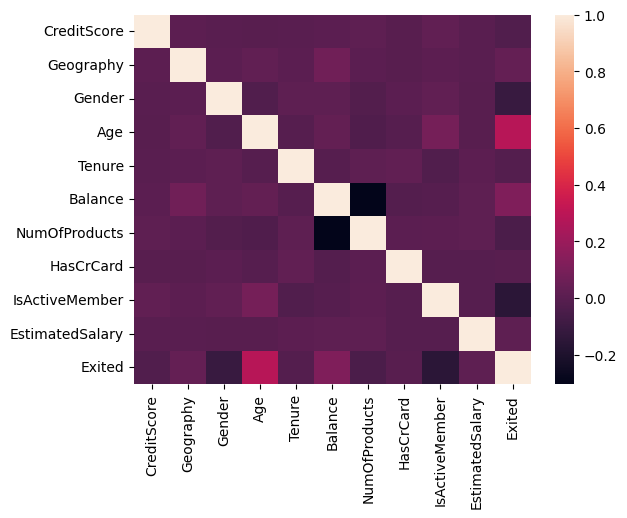

In [14]:
import seaborn as sns
sns.heatmap(df.corr())

In [15]:
x=df.drop(['Exited','Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember'],axis=1)
y=df['Exited']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_std=sc.fit_transform(x)
x_std

array([[0.538     , 0.        , 0.50673489],
       [0.516     , 0.33403148, 0.56270874],
       [0.304     , 0.63635718, 0.56965435],
       ...,
       [0.718     , 0.        , 0.21039009],
       [0.844     , 0.29922631, 0.46442905],
       [0.884     , 0.51870777, 0.19091423]], shape=(10000, 3))

In [17]:
x1=pd.DataFrame(x_std)
x1.columns=x.columns

In [18]:
x1

,CreditScore,Balance,EstimatedSalary
0,0.538,0.000000,0.506735
1,0.516,0.334031,0.562709
2,0.304,0.636357,0.569654
3,0.698,0.000000,0.469120
4,1.000,0.500246,0.395400
...,...,...,...
9995,0.842,0.000000,0.481341
9996,0.332,0.228657,0.508490
9997,0.718,0.000000,0.210390
9998,0.844,0.299226,0.464429


In [19]:
x4=df[['Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]

In [20]:
new_df1= pd.concat([x1,x4], axis=1)

In [21]:
new_df1

,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,0.538,0.000000,0.506735,0,0,42,2,1,1,1
1,0.516,0.334031,0.562709,2,0,41,1,1,0,1
2,0.304,0.636357,0.569654,0,0,42,8,3,1,0
3,0.698,0.000000,0.469120,0,0,39,1,2,0,0
4,1.000,0.500246,0.395400,2,0,43,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.000000,0.481341,0,1,39,5,2,1,0
9996,0.332,0.228657,0.508490,0,1,35,10,1,1,1
9997,0.718,0.000000,0.210390,0,0,36,7,1,0,1
9998,0.844,0.299226,0.464429,1,1,42,3,2,1,0


In [22]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(new_df1,y,train_size=0.8,random_state=123456)

In [24]:
from sklearn.svm import SVC
model = SVC(C=2,kernel='rbf')

In [25]:
model.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [26]:
x_test

,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
8369,0.668,0.505453,0.149936,1,1,37,1,2,1,1
5395,0.478,0.502641,0.669812,1,1,48,5,1,0,1
7996,0.734,0.448250,0.464875,0,0,22,5,1,1,1
4157,1.000,0.000000,0.901246,2,1,62,5,2,1,1
3324,0.916,0.554791,0.370119,2,1,47,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...
8336,0.872,0.487551,0.173520,1,0,33,0,1,0,0
8221,0.186,0.442169,0.364210,1,1,59,4,1,1,0
7049,0.504,0.614279,0.883101,0,0,39,6,2,1,0
986,0.432,0.566449,0.398062,0,1,36,1,1,1,0


In [27]:
x_train

,CreditScore,Balance,EstimatedSalary,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
2073,0.552,0.000000,0.478963,2,0,48,2,2,1,1
3916,0.378,0.000000,0.594797,2,1,36,6,3,1,1
62,0.410,0.223536,0.894018,2,1,33,1,2,0,0
1376,0.214,0.293745,0.928781,0,1,41,8,3,1,1
2070,0.738,0.000000,0.142285,0,0,42,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...
3640,0.576,0.488251,0.475026,1,0,39,0,2,1,1
3121,0.568,0.426578,0.867153,1,1,27,3,1,1,0
4594,0.600,0.639965,0.135324,0,0,31,1,2,0,0
6890,0.280,0.000000,0.855324,0,1,39,1,3,1,0


In [28]:
y_pred=model.predict(x_test)
y_true=y_test

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(confusion_matrix(y_true, y_pred))
print(f"accuracy = {accuracy}")
print(f"precision = {precision}")
print(f"recall = {recall}")
print(f"f1 = {f1}")


[[1585    0]
 [ 415    0]]
accuracy = 0.7925
precision = 0.0
recall = 0.0
f1 = 0.0


c:\Users\ganes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [30]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred1 = model1.predict(x_test)
y_true1 = y_test

accuracy1 = accuracy_score(y_true1, y_pred1)
precision1 = precision_score(y_true1, y_pred1, average='macro')
recall1 = recall_score(y_true1, y_pred1, average='macro')
f11 = f1_score(y_true1, y_pred1, average='macro')

print(f"accuracy = {accuracy1:.2f}")
print(f"precision = {precision1:.2f}")
print(f"recall = {recall1:.2f}")
print(f"f1 = {f11:.2f}")

accuracy = 0.78
precision = 0.67
recall = 0.68
f1 = 0.67


#Que2.-
In this dataset you have to predict that whether we have to give ATTORNEY to the clients or not (0=Yes, 1=No) based on below factors.
CLMAGE - Age of Client
CLMSEX - Sex of client (0=Male, 1= Female)
SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
LOSS - Loss that client faced

Prepare model by using SVM & Decision Tree & Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Dataset : Claimants.csv


In [32]:
df2=pd.read_csv("claimants.csv")
df2

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [33]:
df2.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [34]:
df2.tail()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177
1339,1,1.0,1.0,0.0,30.0,0.688


In [35]:
df2.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [37]:
print(df2.isna().sum())

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64


In [38]:
df2['CLMSEX'].fillna(df2['CLMSEX'].mode()[0], inplace=True)
df2['CLMINSUR'].fillna(df2['CLMINSUR'].mode()[0], inplace=True)
df2['SEATBELT'].fillna(df2['SEATBELT'].mode()[0], inplace=True)
df2['CLMAGE'].fillna(df2['CLMAGE'].mean(), inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_9416\2852419371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CLMSEX'].fillna(df2['CLMSEX'].mode()[0], inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_9416\2852419371.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [39]:
print(df2.isna().sum())

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64


In [40]:
x3=df2.drop(['ATTORNEY','CLMSEX','CLMINSUR','SEATBELT'],axis=1)
y3=df2['ATTORNEY']

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc1=MinMaxScaler()
x_std1=sc1.fit_transform(x3)
x_std1

array([[0.52631579, 0.20126264],
       [0.18947368, 0.00513237],
       [0.05263158, 0.00190088],
       ...,
       [0.41052632, 0.00057026],
       [0.08421053, 0.01830027],
       [0.31578947, 0.00396304]], shape=(1340, 2))

In [42]:
x2=pd.DataFrame(x_std1)
x2.columns=x3.columns

In [43]:
x3

,CLMAGE,LOSS
0,50.000000,34.940
1,18.000000,0.891
2,5.000000,0.330
3,31.000000,0.037
4,30.000000,0.038
...,...,...
1335,28.414422,0.576
1336,46.000000,3.705
1337,39.000000,0.099
1338,8.000000,3.177


In [44]:
x5=df2[['CLMSEX','CLMINSUR','SEATBELT']]

In [45]:
x5

,CLMSEX,CLMINSUR,SEATBELT
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
1335,0.0,1.0,0.0
1336,1.0,1.0,0.0
1337,1.0,1.0,0.0
1338,1.0,0.0,0.0


In [46]:
combine = pd.concat([x3,x5], axis=1)

In [47]:
combine

,CLMAGE,LOSS,CLMSEX,CLMINSUR,SEATBELT
0,50.000000,34.940,0.0,1.0,0.0
1,18.000000,0.891,1.0,0.0,0.0
2,5.000000,0.330,0.0,1.0,0.0
3,31.000000,0.037,0.0,1.0,1.0
4,30.000000,0.038,0.0,1.0,0.0
...,...,...,...,...,...
1335,28.414422,0.576,0.0,1.0,0.0
1336,46.000000,3.705,1.0,1.0,0.0
1337,39.000000,0.099,1.0,1.0,0.0
1338,8.000000,3.177,1.0,0.0,0.0


In [48]:
y3 = df2['ATTORNEY']

In [49]:
y3

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(combine,y3,train_size=0.8,random_state=123456)

In [51]:
from sklearn.svm import SVC
model1 = SVC(C=2,kernel='rbf')

In [52]:
model1.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [53]:
y_pred5=model1.predict(x_test)
y_true5=y_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy5= accuracy_score(y_true5, y_pred5)
precision5 = precision_score(y_true5, y_pred5)
recall5 = recall_score(y_true5, y_pred5)
f15= f1_score(y_true5, y_pred5)

print(confusion_matrix(y_true5, y_pred5))
print(f"accuracy = {accuracy5}")
print(f"precision = {precision5}")
print(f"recall = {recall5}")
print(f"f1 = {f15}")


[[ 72  69]
 [ 20 107]]
accuracy = 0.667910447761194
precision = 0.6079545454545454
recall = 0.84251968503937
f1 = 0.7062706270627063


In [54]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred6 = model2.predict(x_test)
y_true6= y_test

accuracy6 = accuracy_score(y_true6, y_pred6)
precision6 = precision_score(y_true6, y_pred6, average='macro')
recall6 = recall_score(y_true6, y_pred6, average='macro')
f16 = f1_score(y_true6, y_pred6, average='macro')

print(f"accuracy = {accuracy6:.2f}")
print(f"precision = {precision6:.2f}")
print(f"recall = {recall6:.2f}")
print(f"f1 = {f16:.2f}")

accuracy = 0.59
precision = 0.59
recall = 0.59
f1 = 0.59


# Que3.-

The model's main purpose is to predict the 10-year risk of Coronary Heart Disease (CHD). CHD is a disease of the blood vessels supplying the heart. Heart disease has been the leading cause of death worldwide since 1921. In 2008, 7.3 million people died from CHD. 
The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Sex: male or female(0=female, 1=male)
Age: Age of the patient
education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
Current Smoker: whether or not the patient is a current smoker (0=No, 1=Yes)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day
BP Meds: whether or not the patient was on blood pressure medication 
Prevalent Stroke: whether or not the patient had previously had a stroke (0=No, 1=Yes)
Prevalent Hyp: whether or not the patient was hypertensive (0=No, 1=Yes)
Diabetes: whether or not the patient had diabetes (0=No, 1=Yes)
Tot Chol: total cholesterol level
Sys BP: systolic blood pressure 
Dia BP: diastolic blood pressure
BMI: Body Mass Index
Heart Rate: heart rate
Glucose: glucose level

Prepare model by using SVM & Decision Tree & Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Datasets : framingham.csv

In [56]:
df3=pd.read_csv("framingham.csv")
df3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [57]:
df3.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [58]:
df3.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [59]:
df3.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [61]:
print(df3.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [62]:
df3['cigsPerDay'].fillna(df3['cigsPerDay'].mean(), inplace=True)
df3['BPMeds'].fillna(df3['BPMeds'].mean(), inplace=True)
df3['totChol'].fillna(df3['totChol'].mean(), inplace=True)
df3['BMI'].fillna(df3['BMI'].mean(), inplace=True)
df3['heartRate'].fillna(df3['heartRate'].mean(), inplace=True)
df3['glucose'].fillna(df3['glucose'].mean(), inplace=True)
df3['education'].fillna(df3['education'].mean(), inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_9416\1939383326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['cigsPerDay'].fillna(df3['cigsPerDay'].mean(), inplace=True)
C:\Users\ganes\AppData\Local\Temp\ipykernel_9416\1939383326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [63]:
print(df3.isna().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [64]:
x8=df3.drop(['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','education','TenYearCHD'],axis=1)
y8=df3['TenYearCHD']

In [65]:
y8

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc2=MinMaxScaler()
x_std2=sc2.fit_transform(x8)
x_std2

array([[0.18421053, 0.        , 0.14940577, ..., 0.27702375, 0.36363636,
        0.10451977],
       [0.36842105, 0.        , 0.24278438, ..., 0.31968008, 0.51515152,
        0.10169492],
       [0.42105263, 0.28571429, 0.23429542, ..., 0.23751818, 0.31313131,
        0.08474576],
       ...,
       [0.52631579, 0.        , 0.27504244, ..., 0.14372273, 0.36363636,
        0.18926554],
       [0.21052632, 0.        , 0.13242784, ..., 0.24381968, 0.23232323,
        0.09039548],
       [0.18421053, 0.42857143, 0.15110357, ..., 0.13015027, 0.41414141,
        0.11299435]], shape=(4240, 8))

In [67]:
x10=pd.DataFrame(x_std2)
x10.columns=x8.columns

In [68]:
x8

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.963655
4237,52,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,40,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


In [69]:
x15=df3[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes','education']]

In [70]:
x15

,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,education
0,1,0,0.000000,0,0,0,4.0
1,0,0,0.000000,0,0,0,2.0
2,1,1,0.000000,0,0,0,1.0
3,0,1,0.000000,0,1,0,3.0
4,0,1,0.000000,0,0,0,3.0
...,...,...,...,...,...,...,...
4235,0,1,0.029615,0,0,0,2.0
4236,0,1,0.000000,0,0,0,1.0
4237,0,0,0.000000,0,0,0,2.0
4238,1,0,0.000000,0,1,0,3.0


In [71]:
combine1 = pd.concat([x8,x15], axis=1)

In [72]:
combine1

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,education
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,1,0,0.000000,0,0,0,4.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0,0.000000,0,0,0,2.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000,1,1,0.000000,0,0,0,1.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000,0,1,0.000000,0,1,0,3.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000,0,1,0.000000,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.000000,0,1,0.029615,0,0,0,2.0
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.963655,0,1,0.000000,0,0,0,1.0
4237,52,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0,0,0.000000,0,0,0,2.0
4238,40,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,1,0,0.000000,0,1,0,3.0


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(combine1,y8,train_size=0.8,random_state=123456)

In [74]:
from sklearn.svm import SVC
model4 = SVC(C=2,kernel='rbf')

In [75]:
model4.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [76]:
y_pred15=model4.predict(x_test)
y_true15=y_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy15= accuracy_score(y_true15, y_pred15)
precision15 = precision_score(y_true15, y_pred15)
recall15 = recall_score(y_true15, y_pred15)
f155= f1_score(y_true15, y_pred15)

print(confusion_matrix(y_true15, y_pred15))
print(f"accuracy = {accuracy15}")
print(f"precision = {precision15}")
print(f"recall = {recall15}")
print(f"f1 = {f155}")


[[720   3]
 [123   2]]
accuracy = 0.8514150943396226
precision = 0.4
recall = 0.016
f1 = 0.03076923076923077


In [77]:
from sklearn.tree import DecisionTreeClassifier
model12=DecisionTreeClassifier()
model12.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred16 = model12.predict(x_test)
y_true16= y_test

accuracy16 = accuracy_score(y_true16, y_pred16)
precision16 = precision_score(y_true16, y_pred16, average='macro')
recall16 = recall_score(y_true16, y_pred16, average='macro')
f116 = f1_score(y_true16, y_pred16, average='macro')

print(f"accuracy = {accuracy16:.2f}")
print(f"precision = {precision16:.2f}")
print(f"recall = {recall16:.2f}")
print(f"f1 = {f116:.2f}")

accuracy = 0.75
precision = 0.54
recall = 0.55
f1 = 0.55


# Que.4 -
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type: Type of glass: (class attribute)
 1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

Dataset : Glass.csv

Prepare model by using SVM & Decision Tree & Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.


In [79]:
df4 = pd.read_csv("glass.csv")
df4

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [80]:
df4.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [81]:
df4.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [82]:
df4.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [83]:
df4['Type'].count()

np.int64(214)

In [84]:
x12=df4.drop(['Type'],axis=1)
y12=df4['Type']

In [85]:
print(df4.isna().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc4=MinMaxScaler()
x_std7=sc4.fit_transform(x12)
x_std7

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]], shape=(214, 9))

In [87]:
x11=pd.DataFrame(x_std7)
x11.columns=x12.columns

In [88]:
x12

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x12,y12,train_size=0.8,random_state=123456)

In [90]:
from sklearn.svm import SVC
model5 = SVC(C=2,kernel='rbf')

In [91]:
model5.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [92]:
y_pred16=model5.predict(x_test)
y_true16=y_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy16= accuracy_score(y_true16, y_pred16)
precision16 = precision_score(y_true16, y_pred16,average='macro')
recall16 = recall_score(y_true16, y_pred16,average='macro')
f156= f1_score(y_true16, y_pred16,average='macro')

print(confusion_matrix(y_true16, y_pred16))
print(f"accuracy = {accuracy16}")
print(f"precision = {precision16}")
print(f"recall = {recall16}")
print(f"f1 = {f156}")


[[ 8  0  0  0  0  0]
 [16  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 7  0  0  0  0  0]]
accuracy = 0.18604651162790697
precision = 0.031007751937984496
recall = 0.16666666666666666
f1 = 0.05228758169934641


c:\Users\ganes\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [93]:
from sklearn.tree import DecisionTreeClassifier
model13=DecisionTreeClassifier()
model13.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred17 = model13.predict(x_test)
y_true17= y_test

accuracy17 = accuracy_score(y_true17, y_pred17)
precision17 = precision_score(y_true17, y_pred17, average='macro')
recall17 = recall_score(y_true17, y_pred17, average='macro')
f117 = f1_score(y_true17, y_pred17, average='macro')

print(f"accuracy = {accuracy17:.2f}")
print(f"precision = {precision17:.2f}")
print(f"recall = {recall17:.2f}")
print(f"f1 = {f117:.2f}")

accuracy = 0.67
precision = 0.72
recall = 0.71
f1 = 0.70


# Que.5 - 

Implement a SVM & Decision Tree models to classify the animals in the zoo in to different categories.
Calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score.

Dataset : Zoo.csv

NOTES : 

1. Import the dataset.
2. Find out the shape of data.
3. Find out null values in all columns.
4. Drop all the null values.


In [95]:
df5=pd.read_csv("Zoo.csv")
df5

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [96]:
df5.shape

(101, 17)

In [97]:
print(df5.isna().sum())

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64


In [98]:
x153=df5.drop(['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins',	'tail','domestic','catsize','type'],axis=1)
y153=df5['type']

In [99]:
x153

,legs
0,4
1,4
2,0
3,4
4,4
...,...
96,2
97,6
98,4
99,0


In [100]:
y153

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc43=MinMaxScaler()
x_std73=sc43.fit_transform(x153)
x_std73

array([[0.5  ],
       [0.5  ],
       [0.   ],
       [0.5  ],
       [0.5  ],
       [0.5  ],
       [0.5  ],
       [0.   ],
       [0.   ],
       [0.5  ],
       [0.5  ],
       [0.25 ],
       [0.   ],
       [0.   ],
       [0.5  ],
       [0.75 ],
       [0.25 ],
       [0.5  ],
       [0.   ],
       [0.   ],
       [0.25 ],
       [0.25 ],
       [0.5  ],
       [0.25 ],
       [0.75 ],
       [0.5  ],
       [0.5  ],
       [0.25 ],
       [0.5  ],
       [0.25 ],
       [0.75 ],
       [0.5  ],
       [0.25 ],
       [0.25 ],
       [0.   ],
       [0.5  ],
       [0.5  ],
       [0.25 ],
       [0.   ],
       [0.75 ],
       [0.75 ],
       [0.25 ],
       [0.75 ],
       [0.25 ],
       [0.5  ],
       [0.5  ],
       [0.75 ],
       [0.5  ],
       [0.5  ],
       [0.5  ],
       [0.5  ],
       [0.75 ],
       [0.5  ],
       [1.   ],
       [0.5  ],
       [0.5  ],
       [0.25 ],
       [0.25 ],
       [0.25 ],
       [0.25 ],
       [0.   ],
       [0.   ],
       [

In [102]:
x14=pd.DataFrame(x_std73)
x14.columns=x153.columns

In [103]:
x153

,legs
0,4
1,4
2,0
3,4
4,4
...,...
96,2
97,6
98,4
99,0


In [104]:
x163=df5[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins',	'tail','domestic','catsize']]

In [105]:
x163

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [106]:
combine12 = pd.concat([x163,x153], axis=1)

In [107]:
combine12

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,legs
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,4
1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,4
2,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,4
4,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,2
97,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,4
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(combine12,y153,train_size=0.8,random_state=123456)

In [109]:
from sklearn.svm import SVC
model6 = SVC(C=2,kernel='rbf')

In [110]:
model6.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",2
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [111]:
y_pred166=model6.predict(x_test)
y_true166=y_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy166= accuracy_score(y_true166, y_pred166)
precision166 = precision_score(y_true166, y_pred166,average='macro')
recall166 = recall_score(y_true166, y_pred166,average='macro')
f1566= f1_score(y_true166, y_pred166,average='macro')

print(confusion_matrix(y_true166, y_pred166))
print(f"accuracy = {accuracy166}")
print(f"precision = {precision166}")
print(f"recall = {recall166}")
print(f"f1 = {f1566}")

[[8 0 0 0]
 [0 8 0 0]
 [0 0 3 0]
 [0 0 0 2]]
accuracy = 1.0
precision = 1.0
recall = 1.0
f1 = 1.0


In [112]:
from sklearn.tree import DecisionTreeClassifier
model133=DecisionTreeClassifier()
model133.fit(x_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred177 = model133.predict(x_test)
y_true177= y_test

accuracy177 = accuracy_score(y_true177, y_pred177)
precision177 = precision_score(y_true177, y_pred177, average='macro')
recall177 = recall_score(y_true177, y_pred177, average='macro')
f1177 = f1_score(y_true177, y_pred177, average='macro')

print(f"accuracy = {accuracy177:.2f}")
print(f"precision = {precision177:.2f}")
print(f"recall = {recall177:.2f}")
print(f"f1 = {f1177:.2f}")

accuracy = 1.00
precision = 1.00
recall = 1.00
f1 = 1.00
